# **PlantTraits2024 - FGVC11** 
Kaggle plant traits predicting competition.

## **Imports**

In [77]:
import os

import pandas as pd
import matplotlib.pyplot as plt

## **Paths**
Data could be downloaded from the competition page: https://www.kaggle.com/competitions/planttraits2024/data \
Extract into the project root folder.

In [78]:
ROOT = os.getcwd()
TRAIN_IMG_FOLDER = os.path.join(ROOT, 'train_images')
TEST_IMG_FOLDER = os.path.join(ROOT, 'test_images')
TRAIN_PATH = os.path.join(ROOT, 'train.csv')
TEST_PATH = os.path.join(ROOT, 'test.csv')

## **Load data**

In [79]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

## **Check up data**

In [80]:
train_df.iloc[0, 1:164]

WORLDCLIM_BIO1_annual_mean_temperature                                    12.235703
WORLDCLIM_BIO12_annual_precipitation                                     374.466675
WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month     62.524445
WORLDCLIM_BIO15_precipitation_seasonality                                 72.256844
WORLDCLIM_BIO4_temperature_seasonality                                   773.592041
                                                                            ...    
VOD_X_1997_2018_multiyear_mean_m08                                         0.423471
VOD_X_1997_2018_multiyear_mean_m09                                         0.444432
VOD_X_1997_2018_multiyear_mean_m10                                         0.472432
VOD_X_1997_2018_multiyear_mean_m11                                         0.448272
VOD_X_1997_2018_multiyear_mean_m12                                         0.403038
Name: 0, Length: 163, dtype: float64

In [81]:
train_df.iloc[0, 164:170]

X4_mean        0.401753
X11_mean      11.758108
X18_mean       0.117484
X26_mean       1.243779
X50_mean       1.849375
X3112_mean    50.216034
Name: 0, dtype: float64

In [82]:
train_df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,0.117484,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.389315,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,8.552908,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,1.083629,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,0.657585,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899


X*_mean values are targets to predict \
X*_sd could be used during training

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Columns: 176 entries, id to X3112_sd
dtypes: float64(54), int64(122)
memory usage: 74.5 MB


In [84]:
test_df.head()

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
0,201238668,8.086756,2246.500000,127.321426,20.423418,353.381042,17.535713,80,109,90,...,0.385838,0.389460,0.387536,0.374910,0.363712,0.364623,0.379435,0.388294,0.398887,0.397853
1,202310319,10.844286,495.871429,28.023809,18.738306,786.554382,29.292856,130,155,142,...,0.279171,0.300813,0.332776,0.314386,0.291168,0.280947,0.277623,0.276503,0.271212,0.272672
2,202604412,8.105556,378.328583,39.928570,41.885647,722.071167,34.853809,133,134,139,...,0.392073,0.418509,0.437172,0.453239,0.445230,0.435441,0.432758,0.429839,0.417250,0.394216
3,201353439,7.077679,878.785706,70.428574,37.045235,669.389343,25.150000,103,140,116,...,0.384626,0.313667,0.352311,0.401131,0.513455,0.519174,0.474007,0.469071,0.408466,0.366724
4,195351745,4.790555,2299.366699,150.199997,24.136568,462.887695,22.516666,85,114,98,...,0.515619,0.506952,0.462181,0.397052,0.358262,0.369279,0.414420,0.469002,0.519534,0.521837


In [85]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6545 entries, 0 to 6544
Columns: 164 entries, id to VOD_X_1997_2018_multiyear_mean_m12
dtypes: float64(42), int64(122)
memory usage: 8.2 MB


## **Target columns names**

In [86]:
target_columns = train_df.iloc[:, 164:170].columns.to_list()
target_columns

['X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean']

## **Check up and drop anomalies**

In [87]:
def target_stat():
    for column in target_columns:
        min, max, mean, std = train_df[column].agg(['min', 'max', 'mean', 'std'])
        print(f'{column} | Min: {min:.7f} | Max: {max:.2f} | Mean: {mean:.2f} | Std: {std:.5f}')

target_stat()

X4_mean | Min: -2.4311567 | Max: 4.48 | Mean: 0.52 | Std: 0.17485
X11_mean | Min: 0.0000678 | Max: 1504254.33 | Mean: 132.53 | Std: 12782.19668
X18_mean | Min: 0.0000000 | Max: 272049414.70 | Mean: 19699.02 | Std: 2309746.81713
X26_mean | Min: 0.0000006 | Max: 31065546.72 | Mean: 3459.40 | Std: 247191.90292
X50_mean | Min: 0.0000968 | Max: 159759.90 | Mean: 13.53 | Std: 1356.48079
X3112_mean | Min: 0.0000001 | Max: 21559109122.00 | Mean: 397555.22 | Std: 91524633.45123


We can see there are anomalies in target variables and especially in X3112. These anomalies will make learning unstable so we need to cut them off.

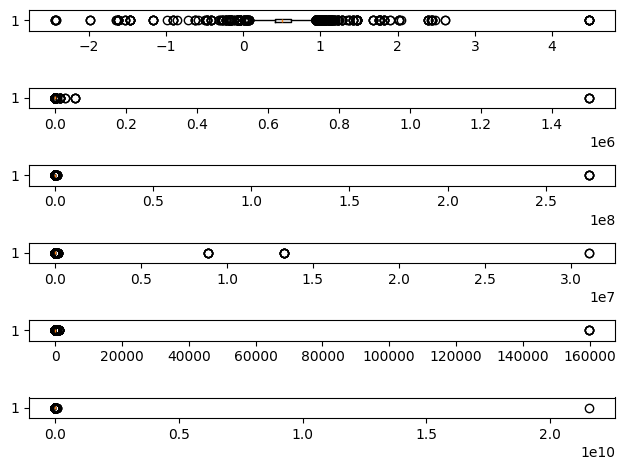

In [88]:
def target_boxplot():
    fig, ax = plt.subplots(len(target_columns))
    for i, column in enumerate(target_columns):
        ax[i].boxplot(train_df[column], vert=False)

    plt.tight_layout()
    plt.show()

target_boxplot()

In [89]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=3000)
prediction = clf.fit_predict(train_df.iloc[:, 1:164])
train_df['outlier'] = prediction

In [90]:
train_df = train_df[train_df['outlier'] != -1]
train_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd,outlier
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054,1
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477,1
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN,1
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187,1
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN,1
55485,194523231,13.724150,1450.000000,162.260208,43.139324,652.716858,26.694387,125,144,135,...,12.713048,2.418300,1630.015480,0.005474,0.128133,0.117010,3.164520,0.082212,136.503697,1
55486,195888987,14.741204,581.866638,109.231110,89.272148,507.273010,26.874668,118,155,136,...,10.206478,2.722599,602.229880,0.019727,0.215040,0.156309,0.919139,0.079395,26.159626,1
55487,135487319,16.094763,1180.838135,80.176193,22.909716,342.184021,17.346189,109,130,117,...,9.372170,3.251739,244.387170,NaN,NaN,NaN,NaN,NaN,NaN,1


After isolation forest we can drop outliers by z-score

In [91]:
for column in target_columns:
    mean = train_df[column].mean()
    std = train_df[column].std()
    train_df = train_df[((train_df[column] - mean) / std).abs() < 2]

In [92]:
train_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd,outlier
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054,1
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477,1
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN,1
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187,1
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN,1
55485,194523231,13.724150,1450.000000,162.260208,43.139324,652.716858,26.694387,125,144,135,...,12.713048,2.418300,1630.015480,0.005474,0.128133,0.117010,3.164520,0.082212,136.503697,1
55486,195888987,14.741204,581.866638,109.231110,89.272148,507.273010,26.874668,118,155,136,...,10.206478,2.722599,602.229880,0.019727,0.215040,0.156309,0.919139,0.079395,26.159626,1
55487,135487319,16.094763,1180.838135,80.176193,22.909716,342.184021,17.346189,109,130,117,...,9.372170,3.251739,244.387170,NaN,NaN,NaN,NaN,NaN,NaN,1


In [93]:
target_stat()

X4_mean | Min: 0.1765572 | Max: 0.88 | Mean: 0.52 | Std: 0.13985
X11_mean | Min: 1.3473389 | Max: 60.21 | Mean: 16.01 | Std: 7.93579
X18_mean | Min: 0.0029192 | Max: 62.77 | Mean: 3.24 | Std: 5.59710
X26_mean | Min: 0.0001791 | Max: 1178.65 | Mean: 32.67 | Std: 110.35485
X50_mean | Min: 0.0311970 | Max: 4.35 | Mean: 1.59 | Std: 0.63718
X3112_mean | Min: 1.1088304 | Max: 15855.85 | Mean: 1668.91 | Std: 2350.04625


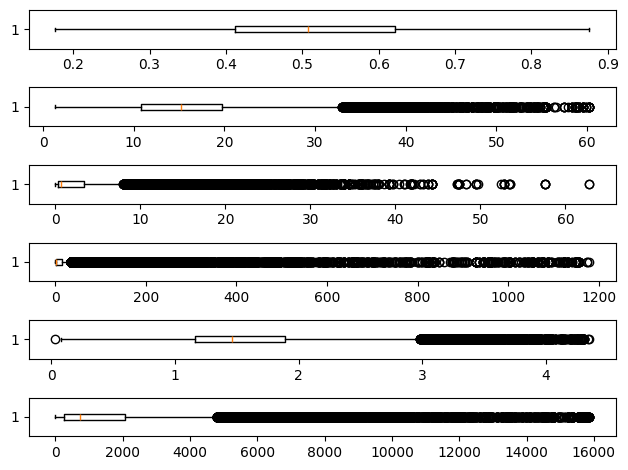

In [94]:
target_boxplot()

## **Save preprocessed data**

In [95]:
train_df = train_df.drop(['outlier'], axis=1)
train_df.to_csv('train_preprocessed.csv', index=0)